In [2]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('C:/Users/shaha/Downloads/covid_19_data.csv')

In [4]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [5]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [7]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
imputer = SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [11]:
df3=df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [12]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
5,Afghanistan,2020-02-27,1.0,0.0,0.0
6,Afghanistan,2020-02-28,1.0,0.0,0.0
7,Afghanistan,2020-02-29,1.0,0.0,0.0
8,Afghanistan,2020-03-01,1.0,0.0,0.0
9,Afghanistan,2020-03-02,1.0,0.0,0.0


In [15]:
countries=df3['Country'].unique()
len(countries)

229

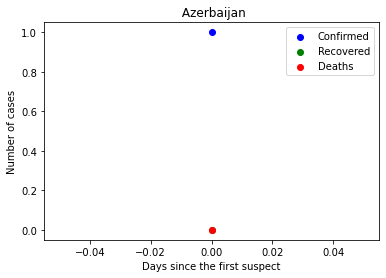

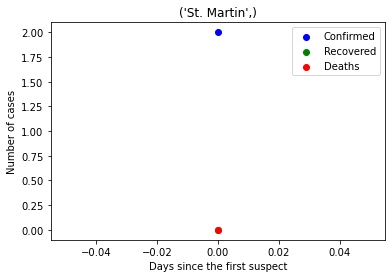

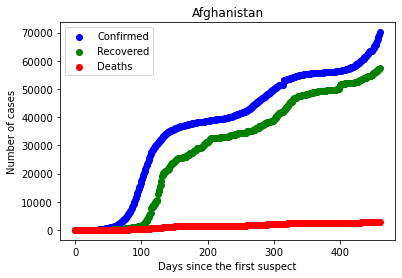

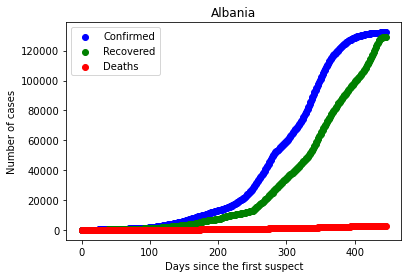

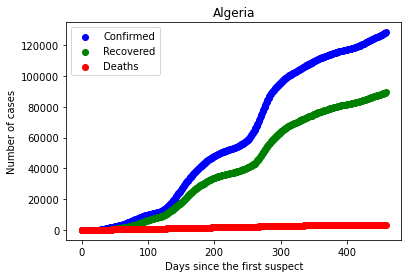

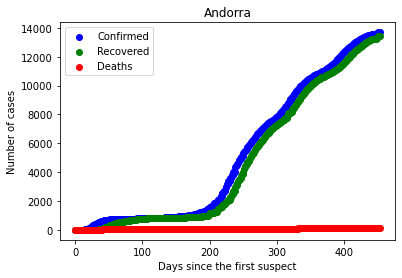

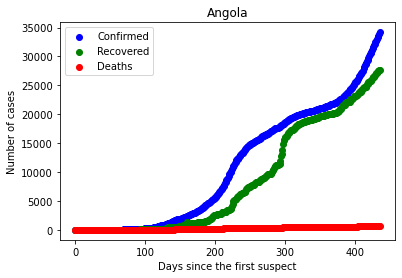

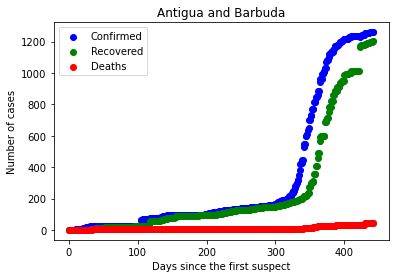

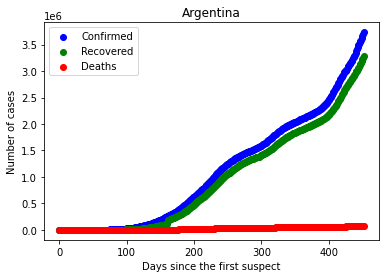

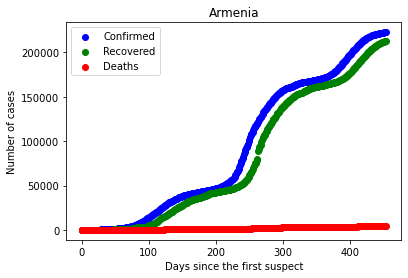

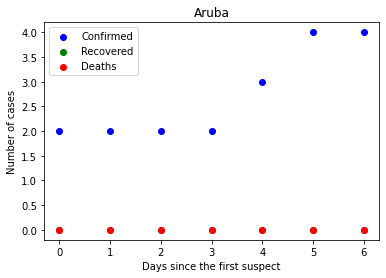

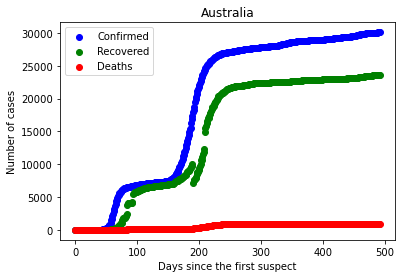

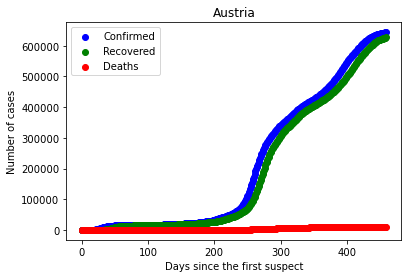

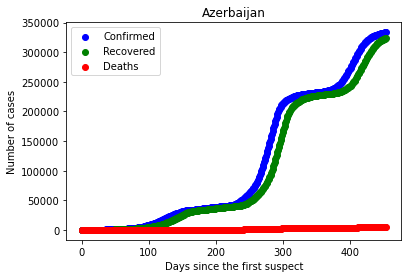

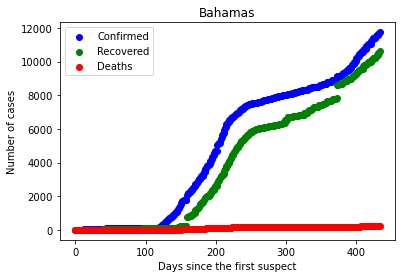

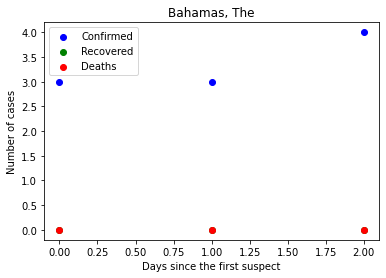

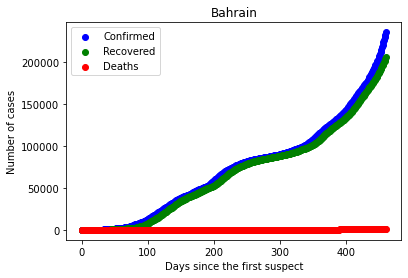

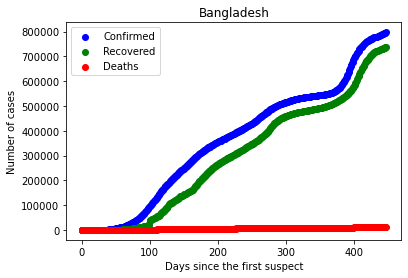

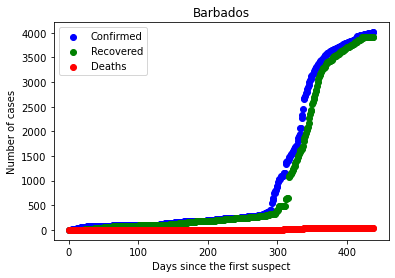

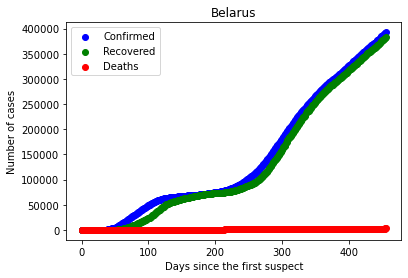

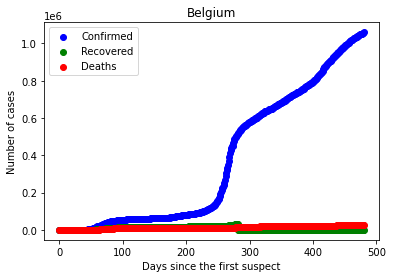

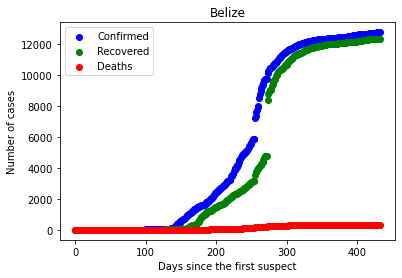

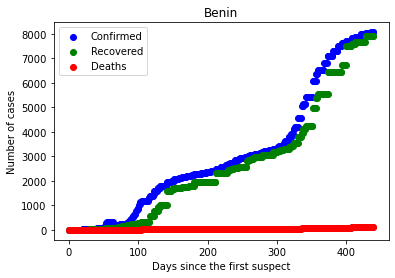

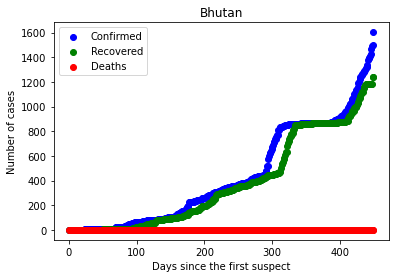

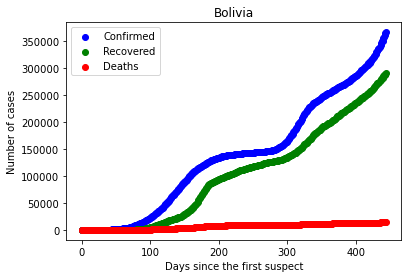

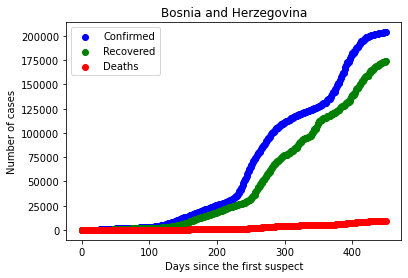

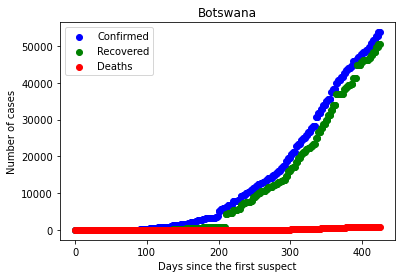

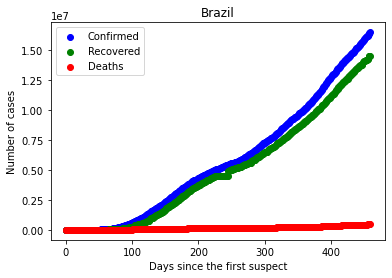

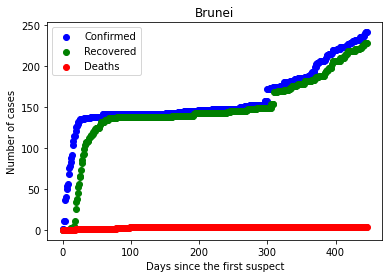

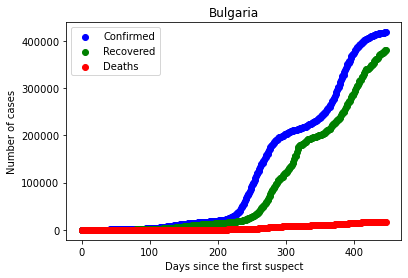

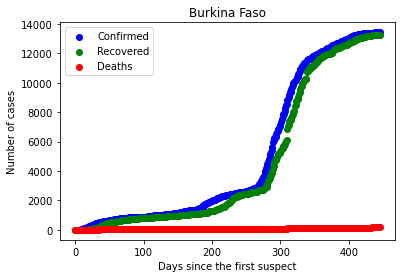

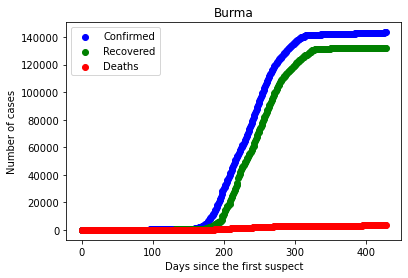

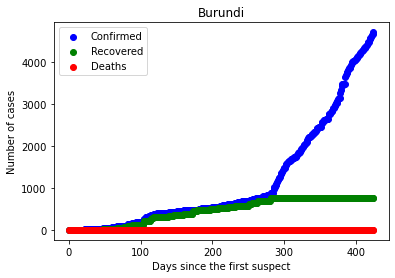

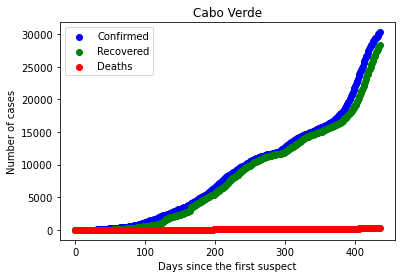

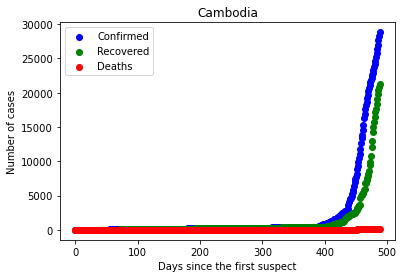

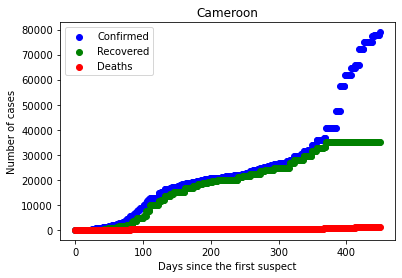

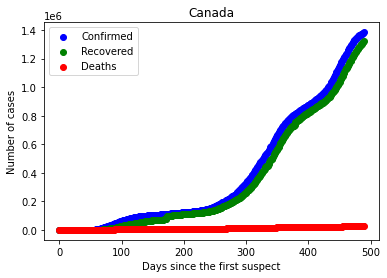

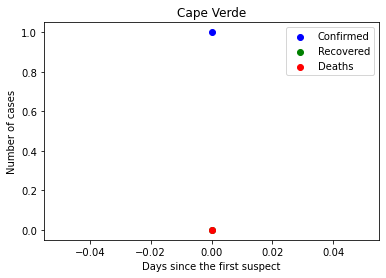

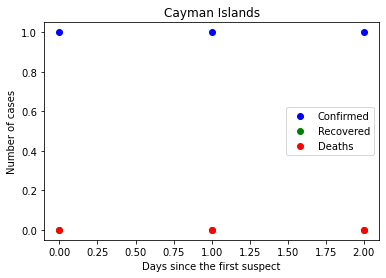

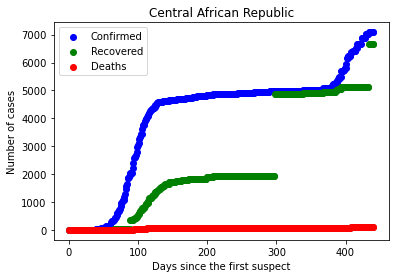

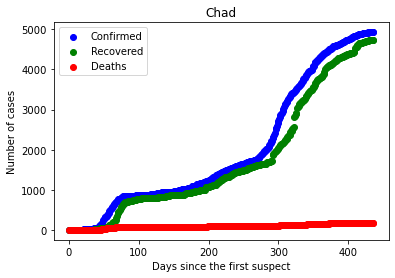

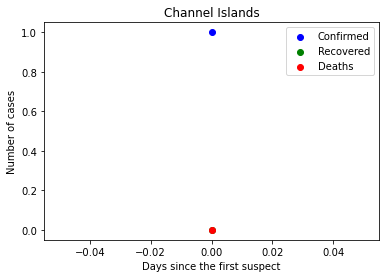

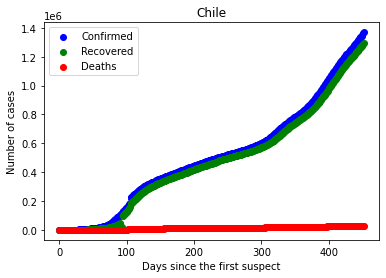

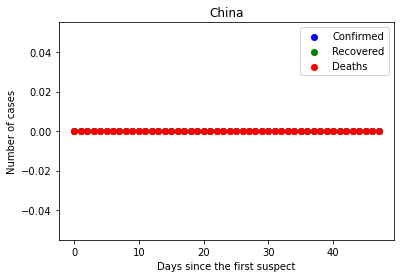

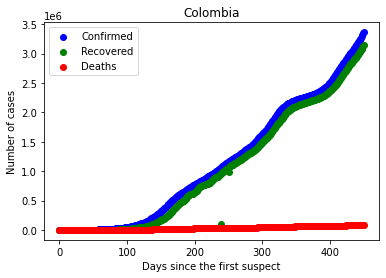

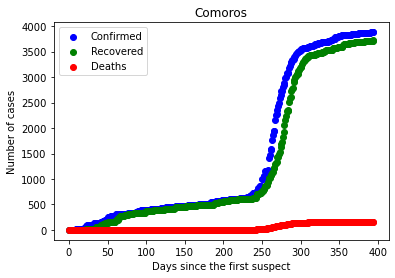

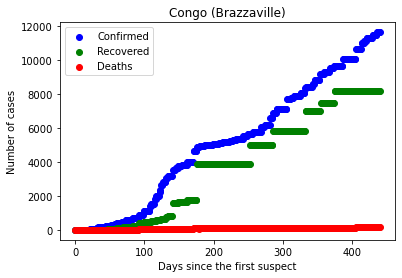

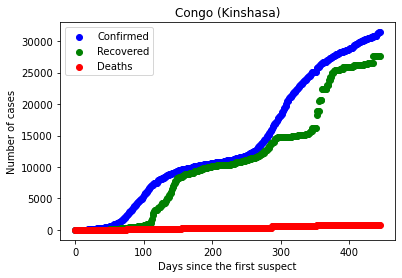

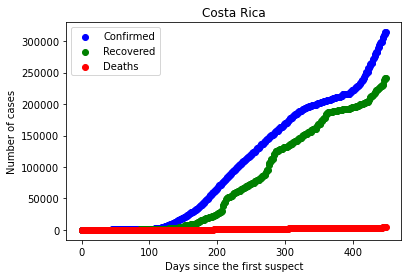

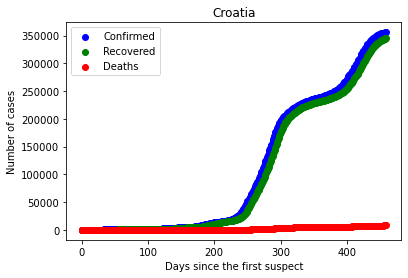

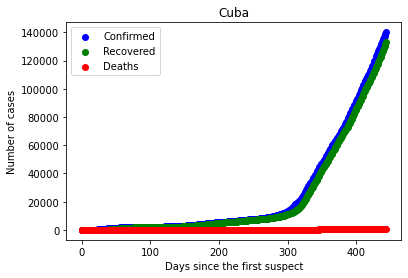

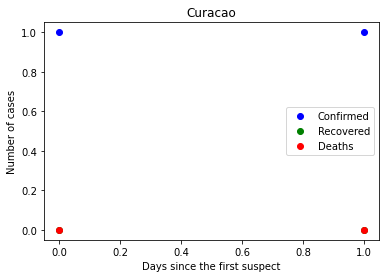

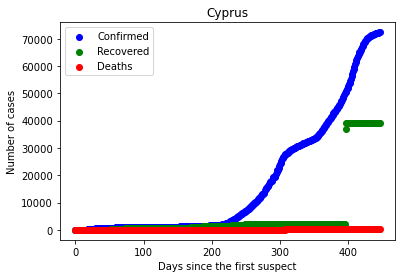

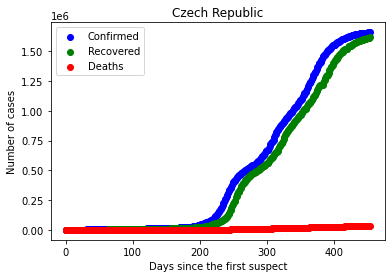

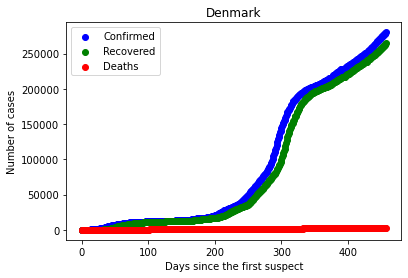

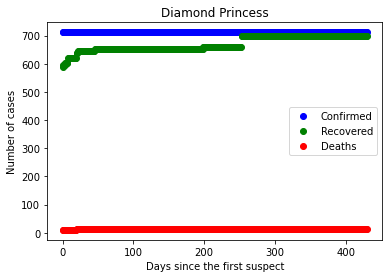

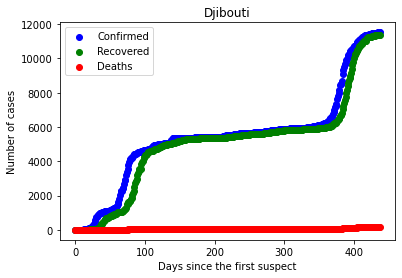

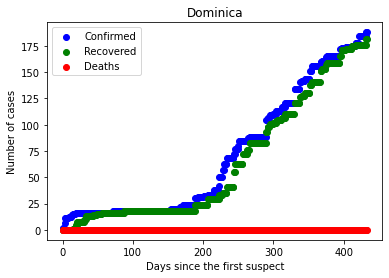

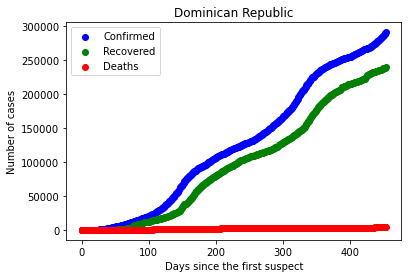

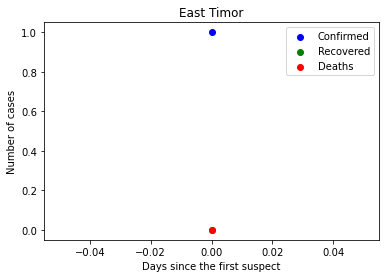

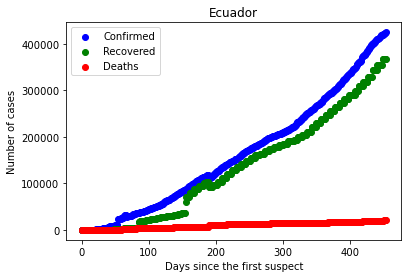

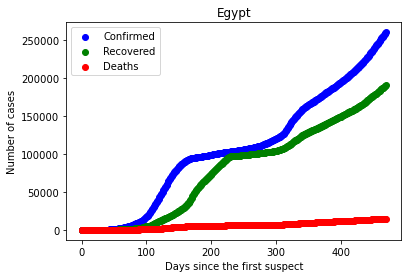

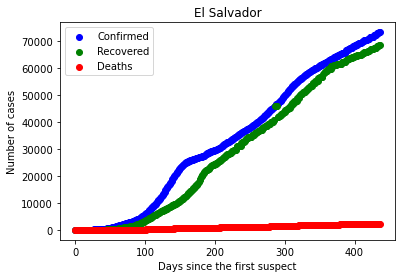

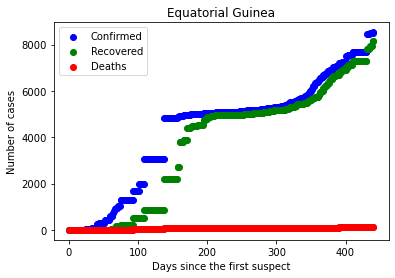

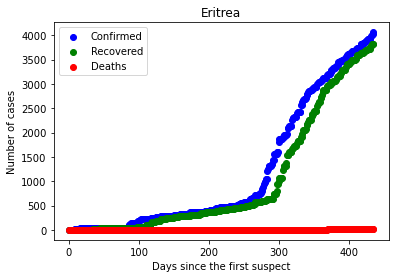

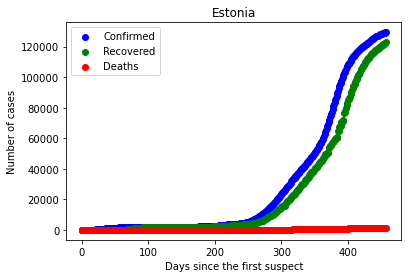

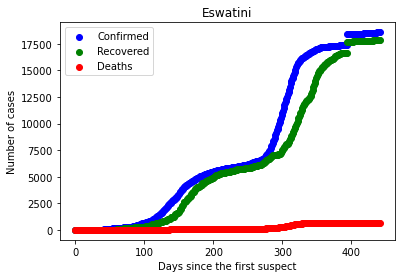

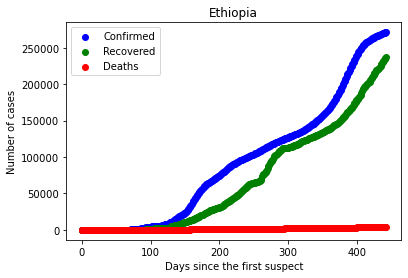

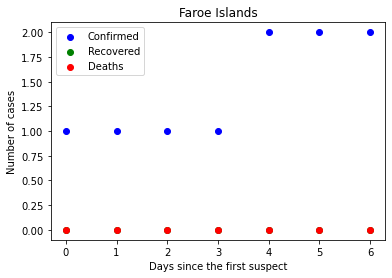

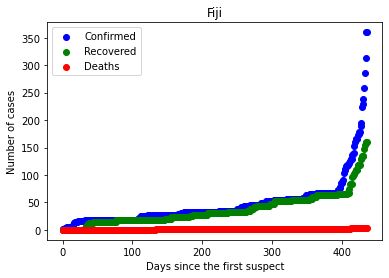

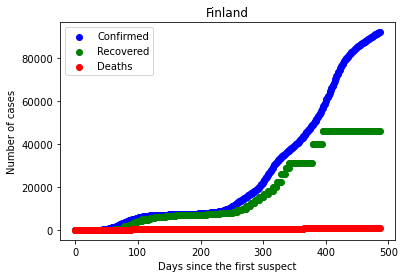

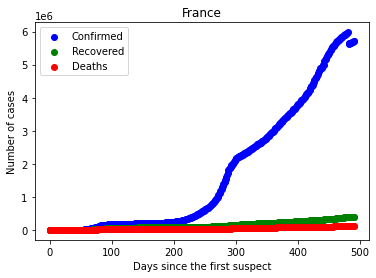

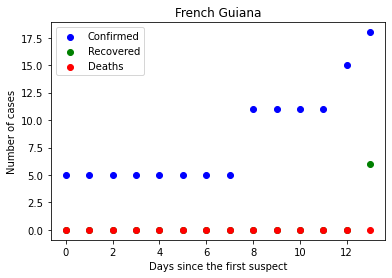

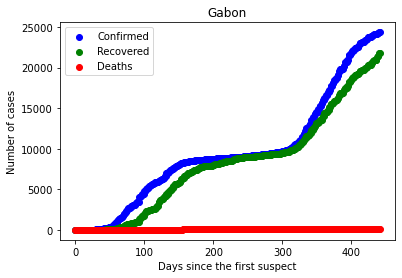

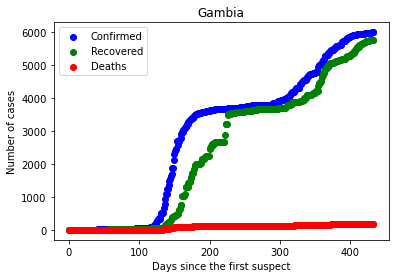

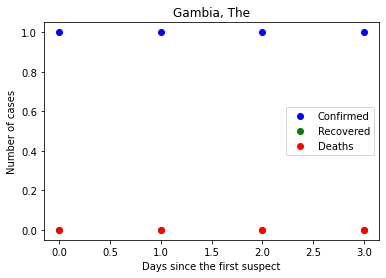

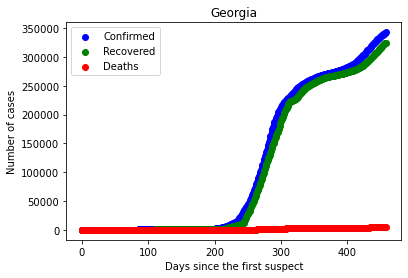

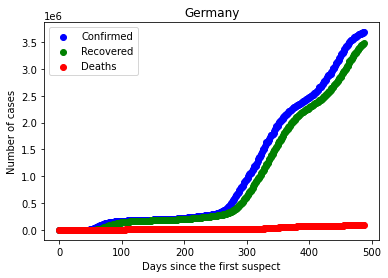

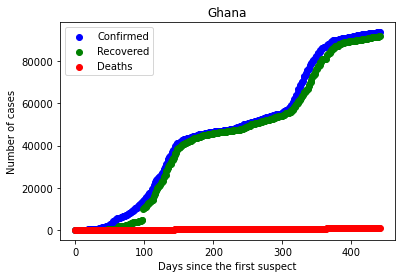

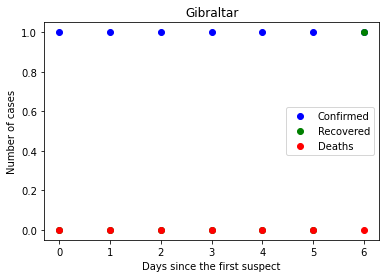

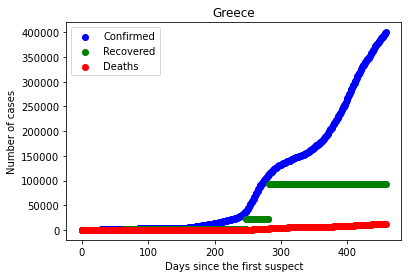

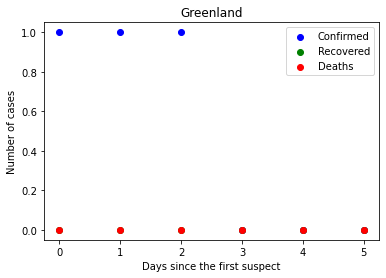

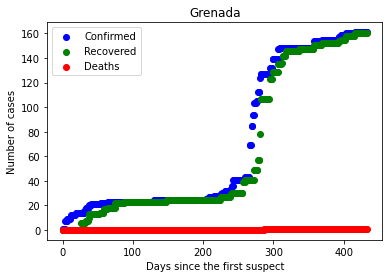

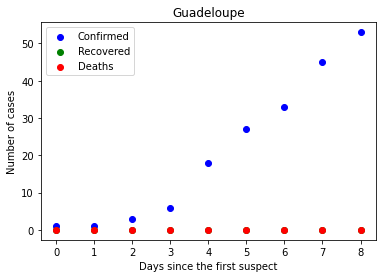

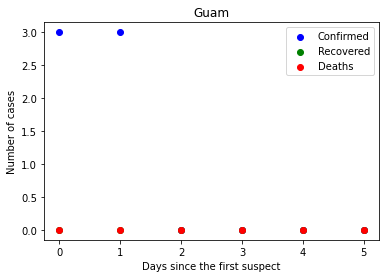

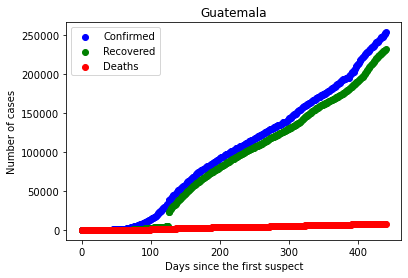

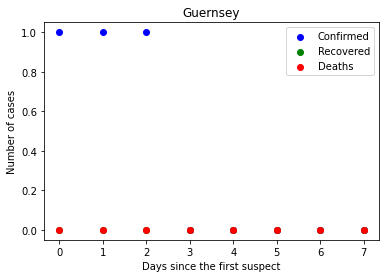

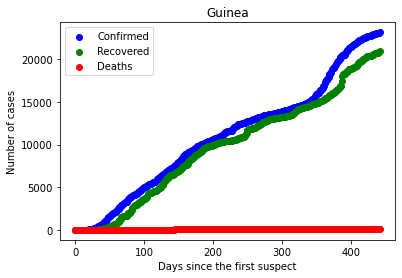

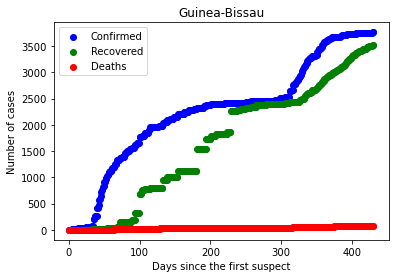

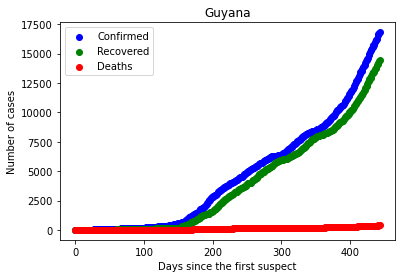

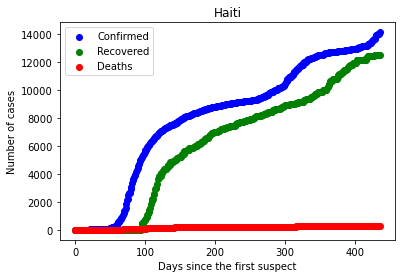

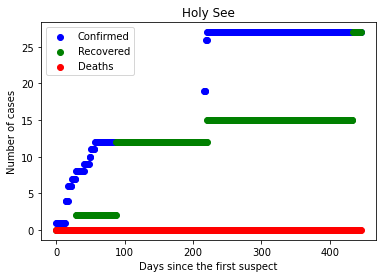

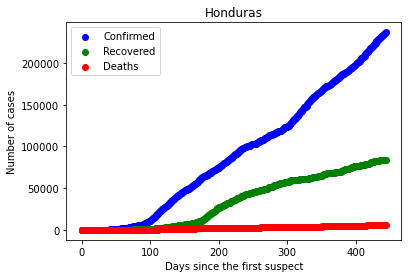

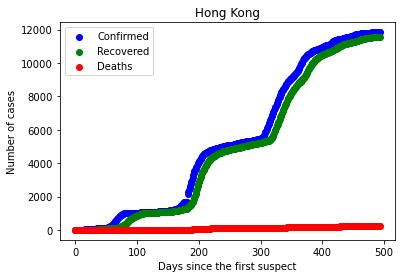

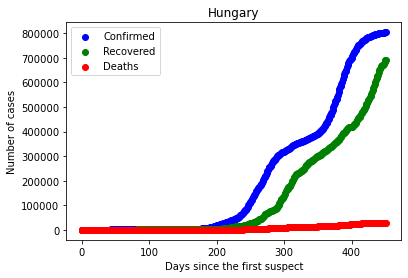

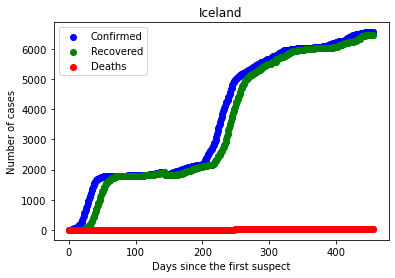

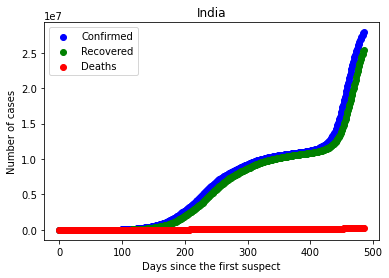

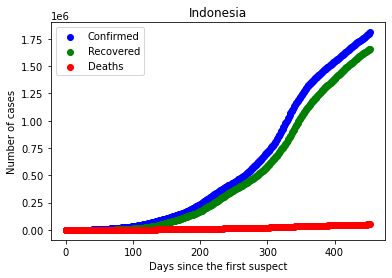

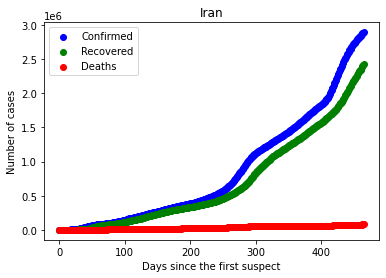

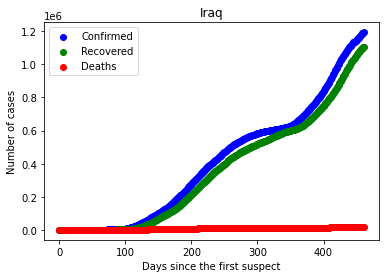

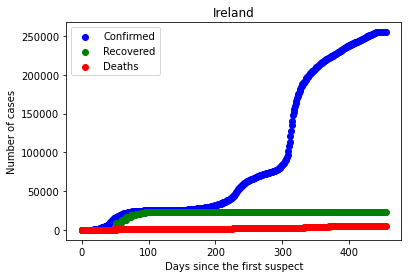

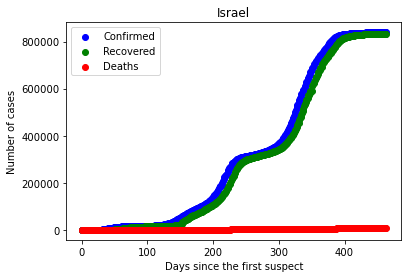

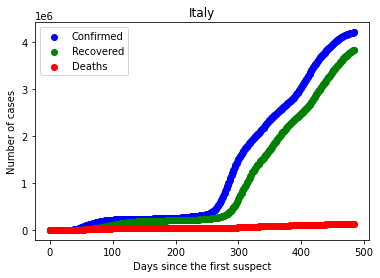

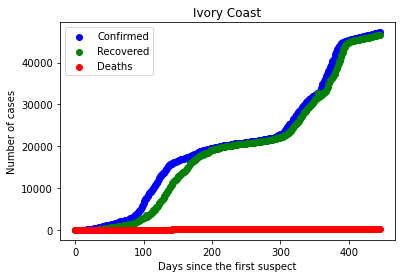

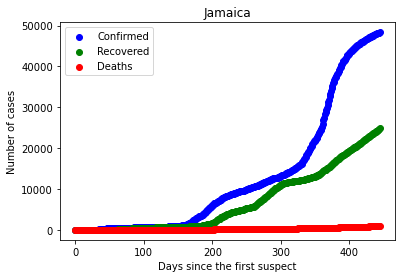

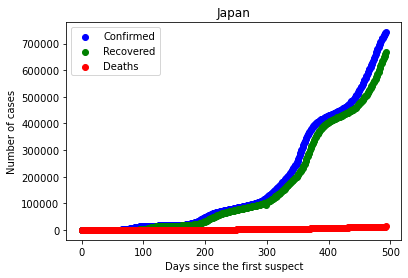

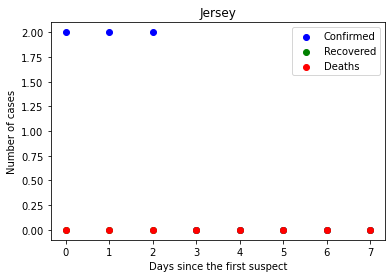

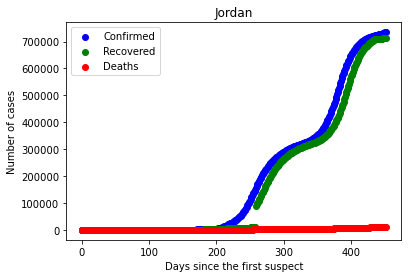

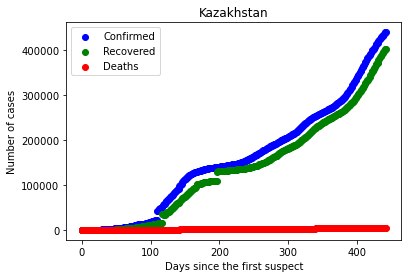

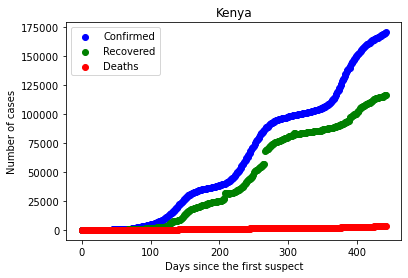

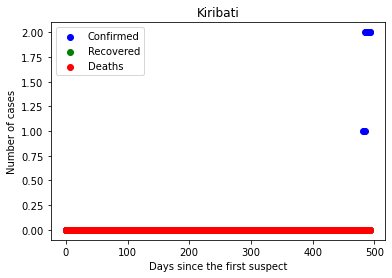

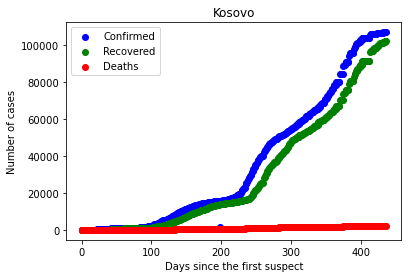

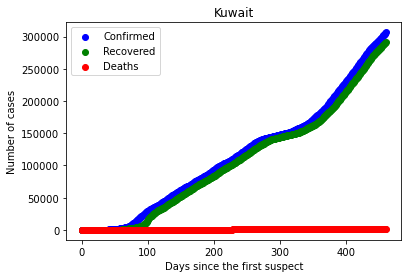

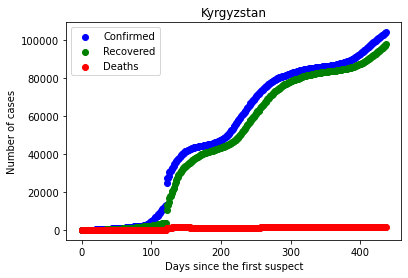

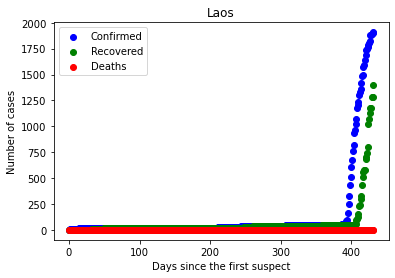

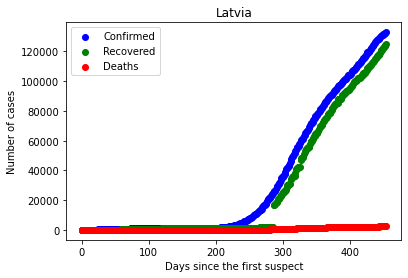

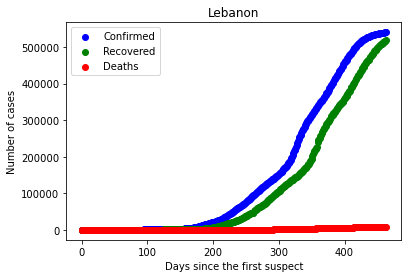

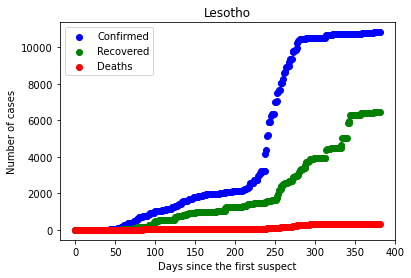

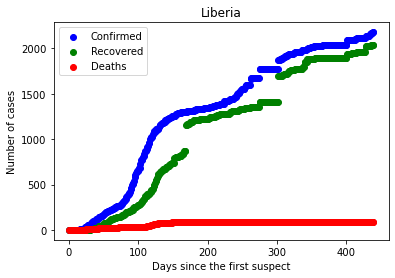

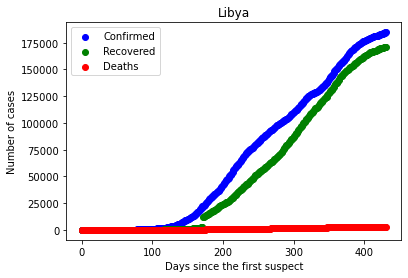

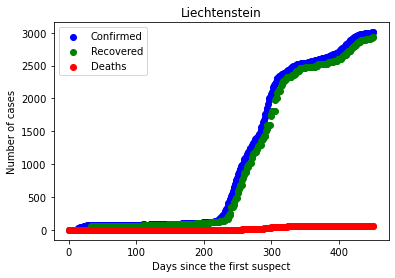

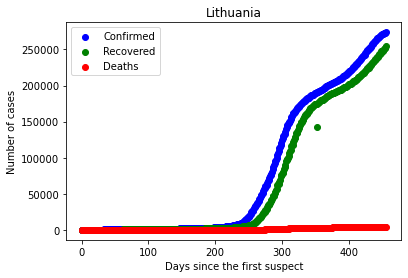

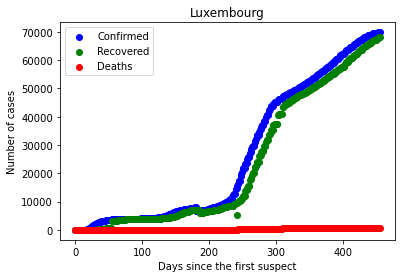

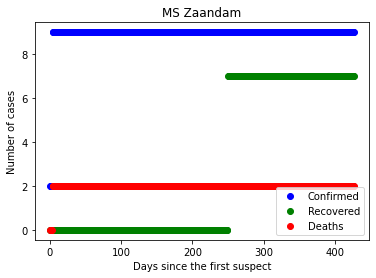

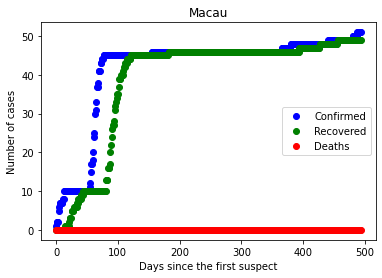

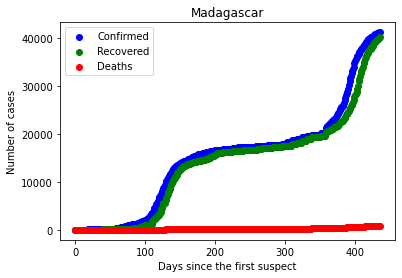

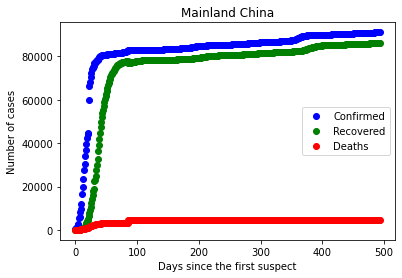

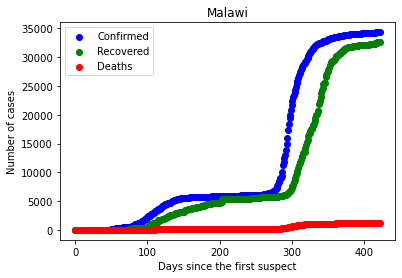

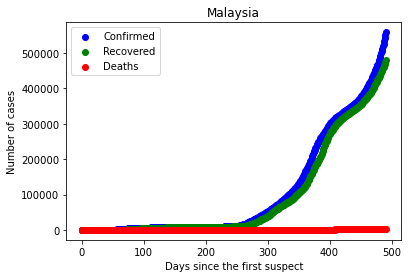

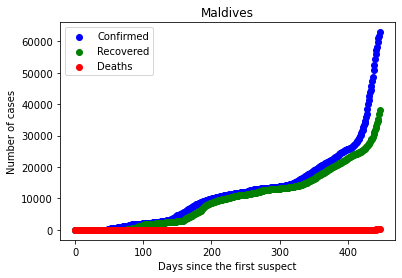

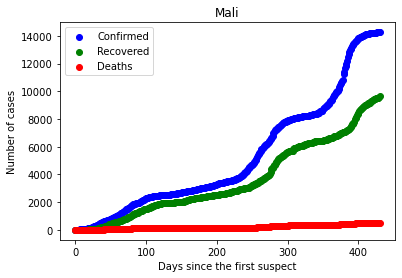

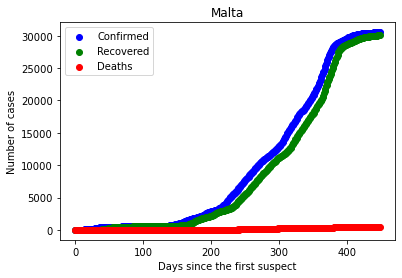

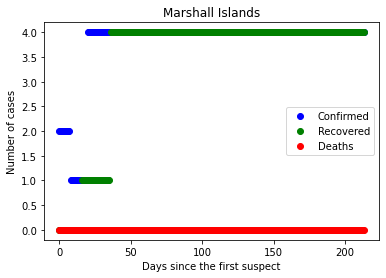

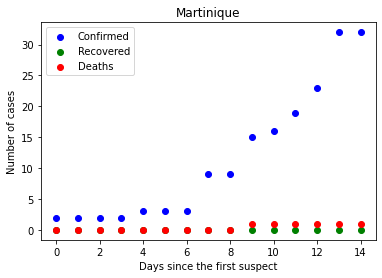

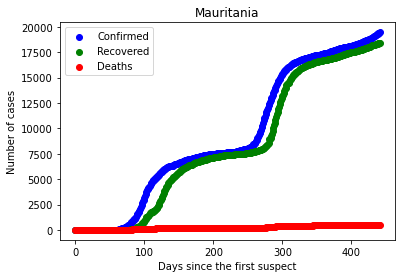

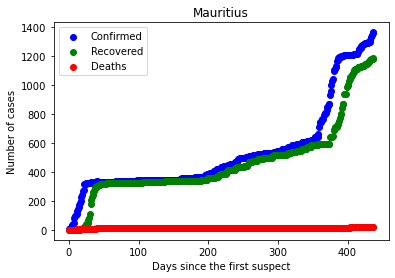

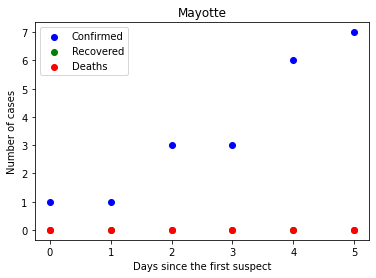

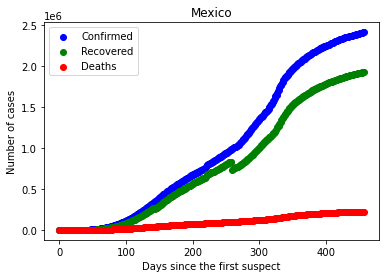

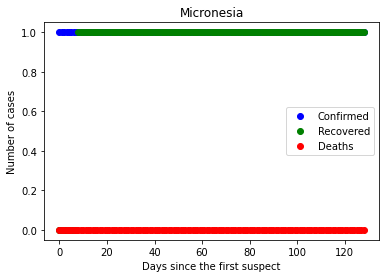

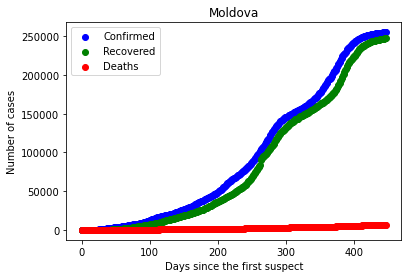

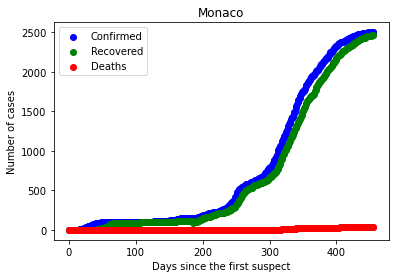

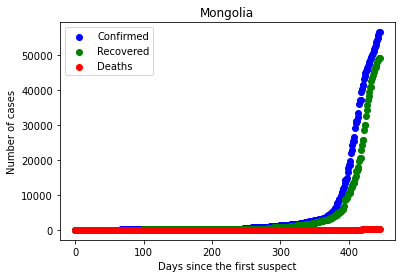

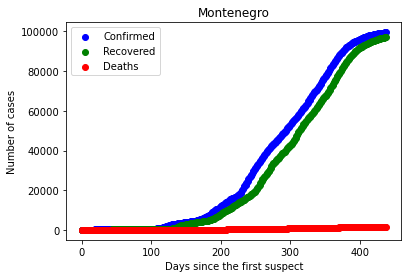

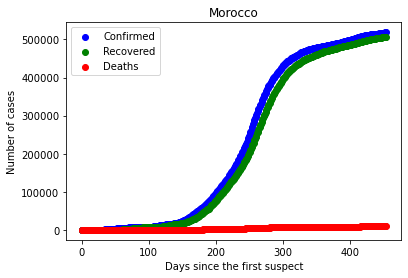

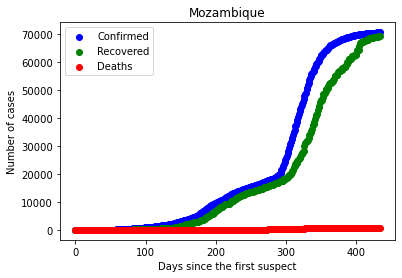

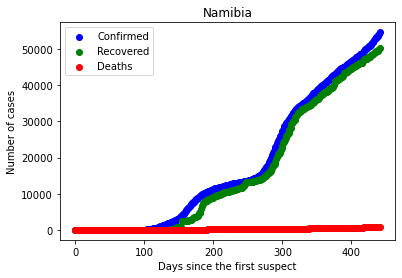

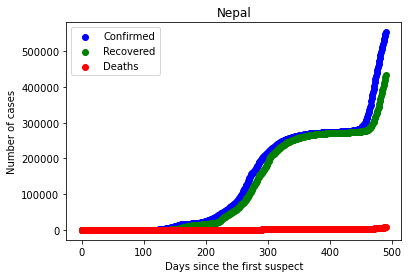

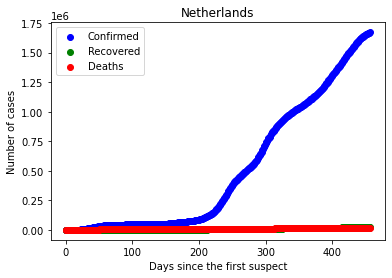

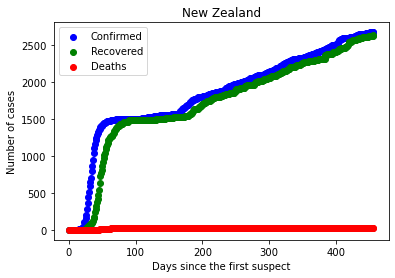

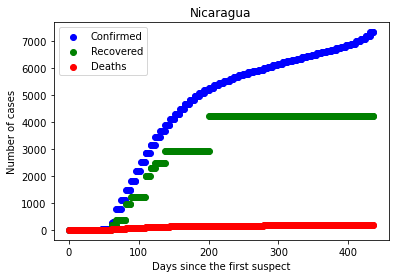

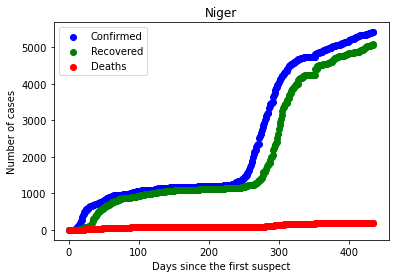

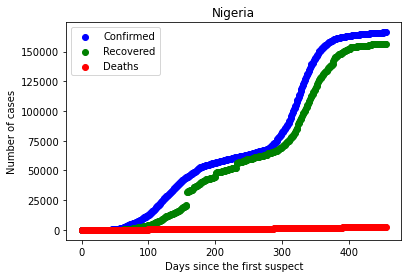

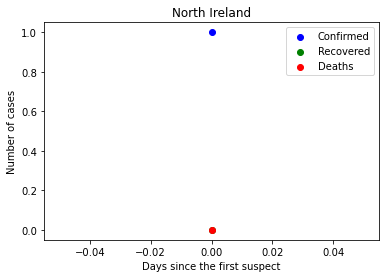

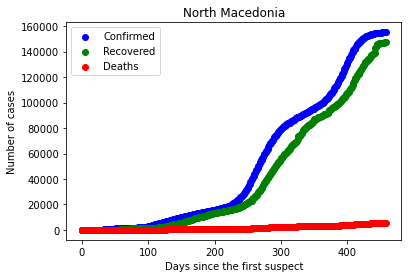

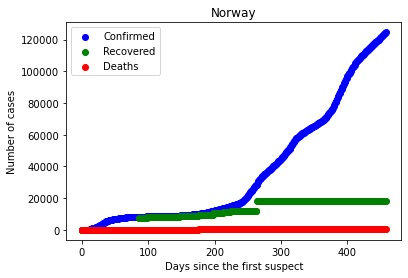

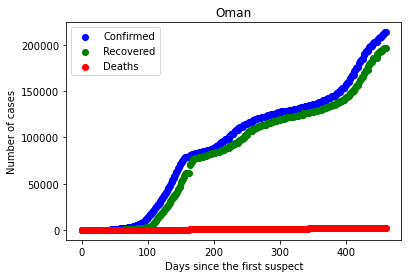

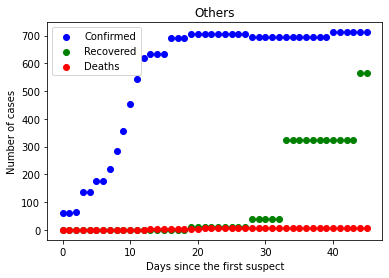

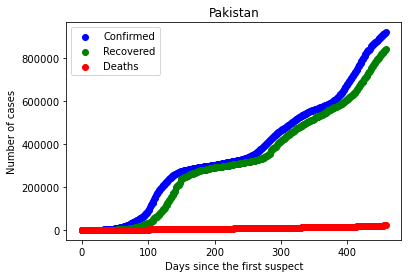

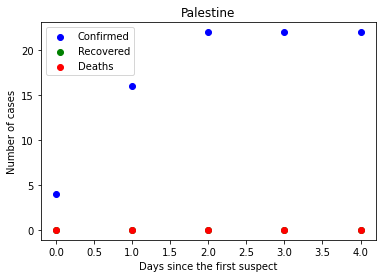

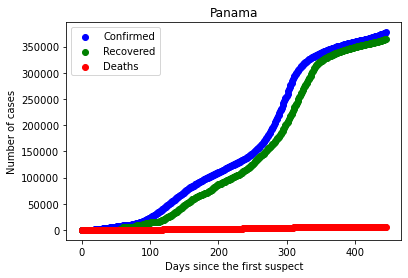

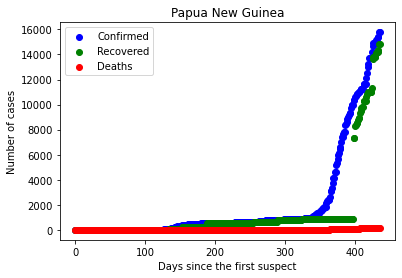

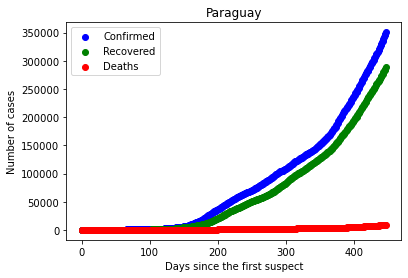

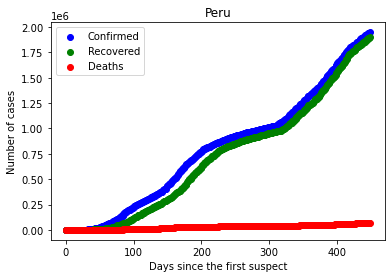

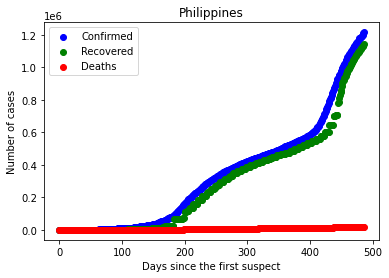

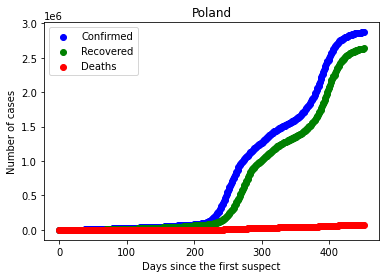

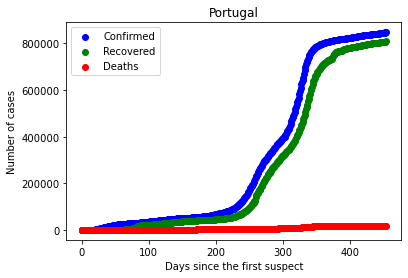

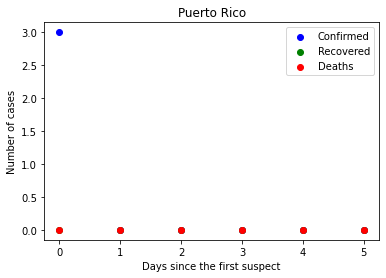

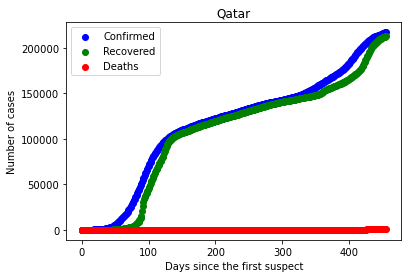

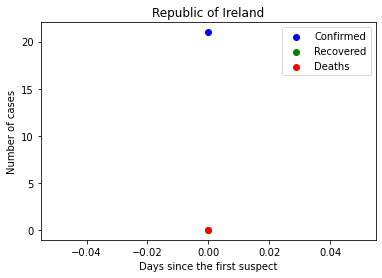

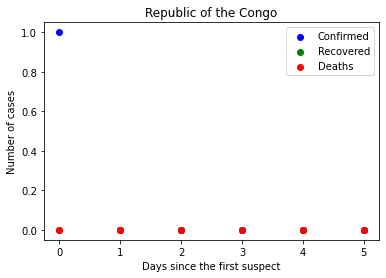

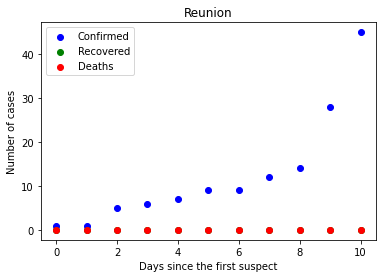

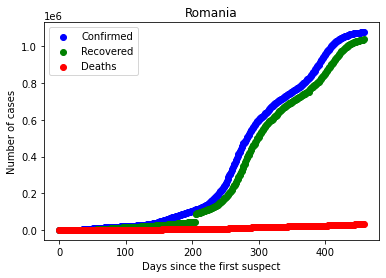

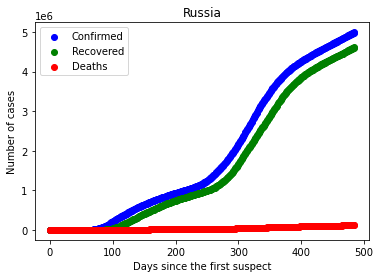

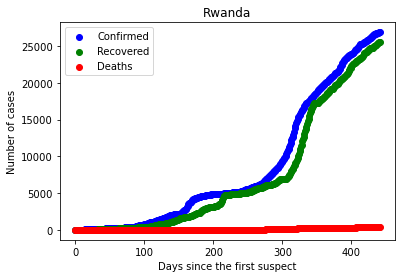

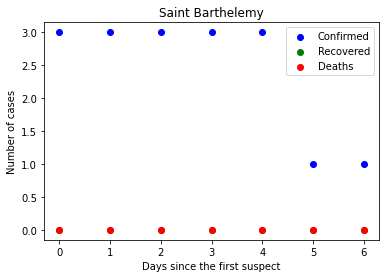

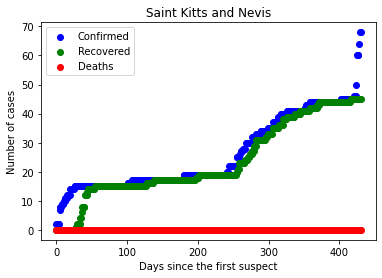

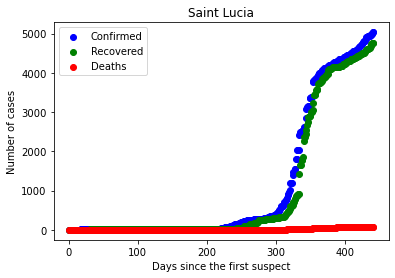

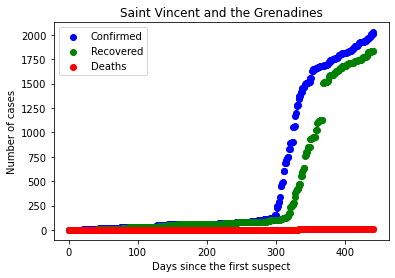

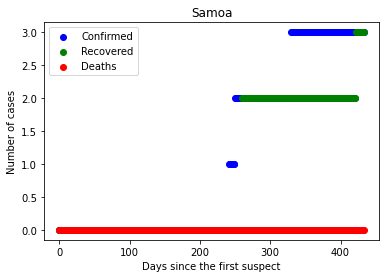

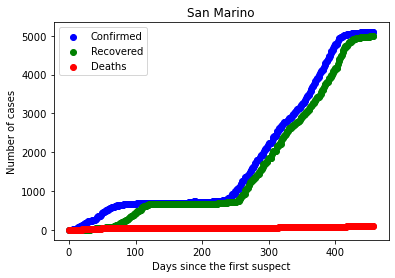

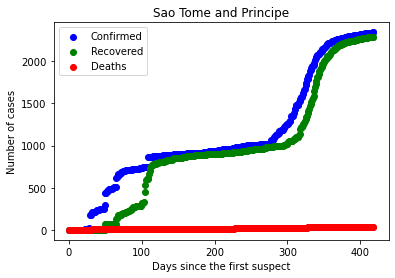

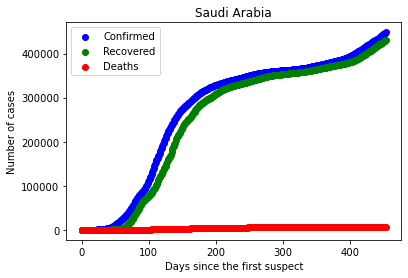

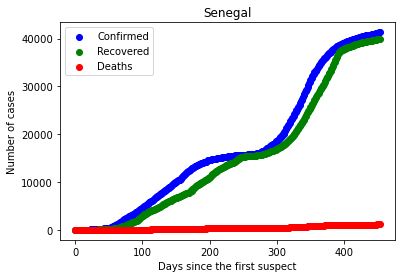

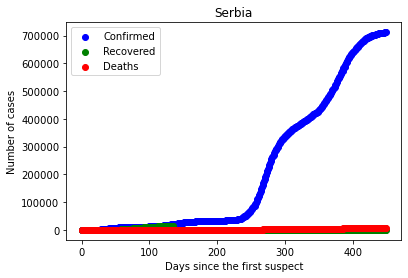

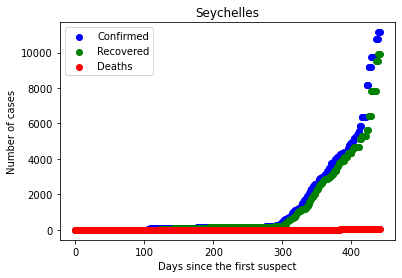

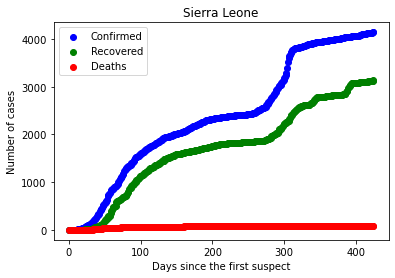

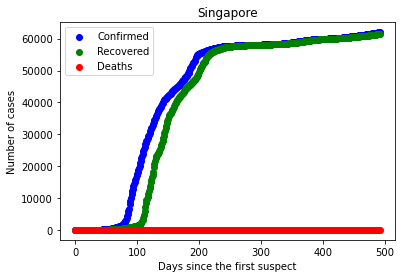

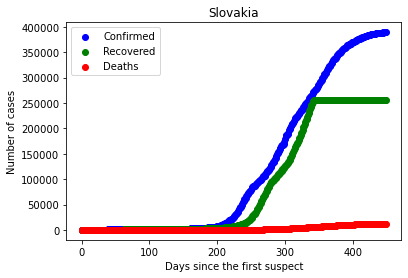

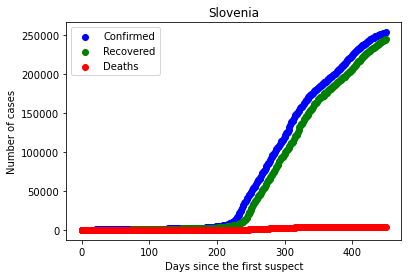

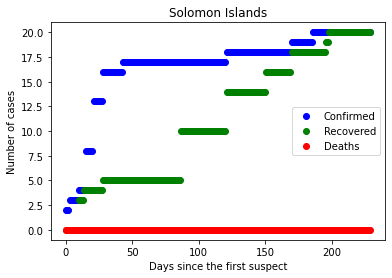

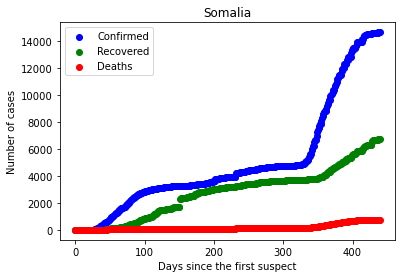

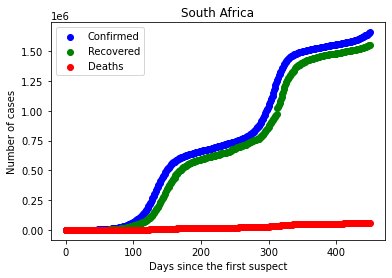

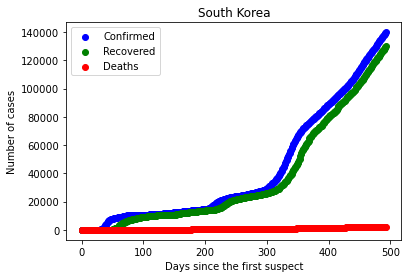

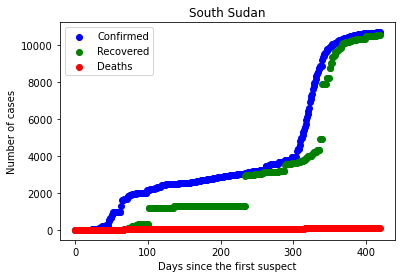

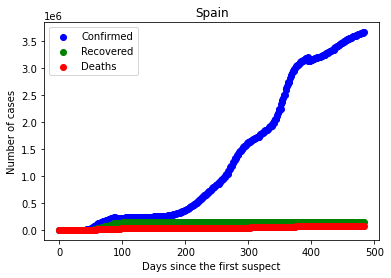

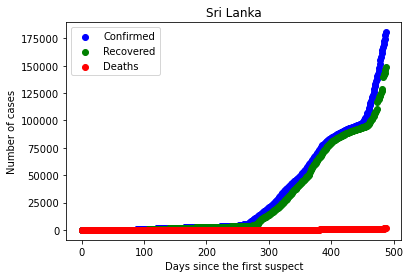

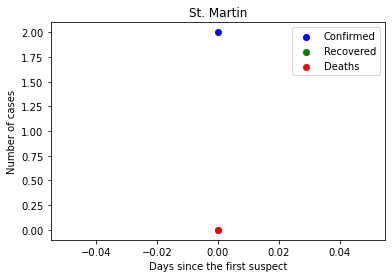

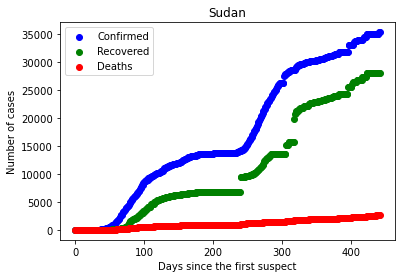

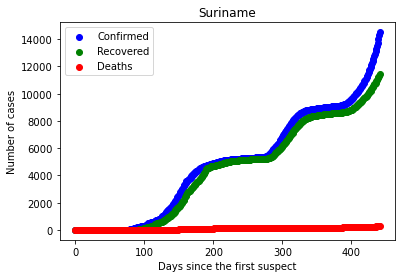

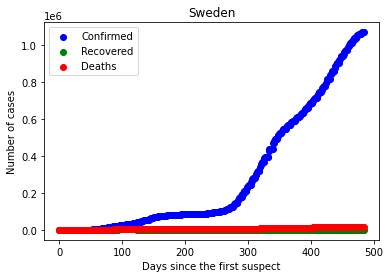

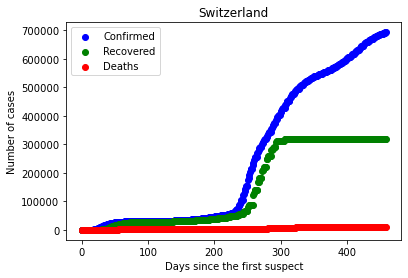

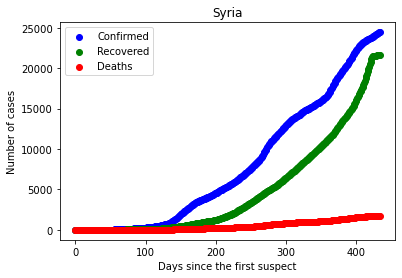

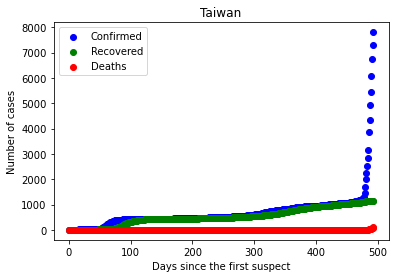

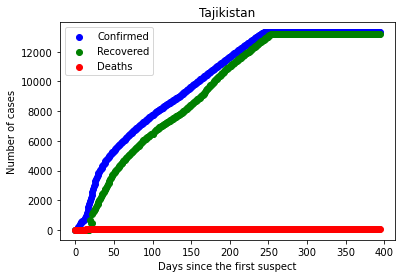

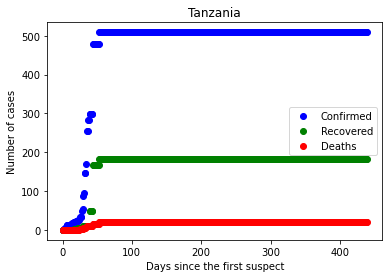

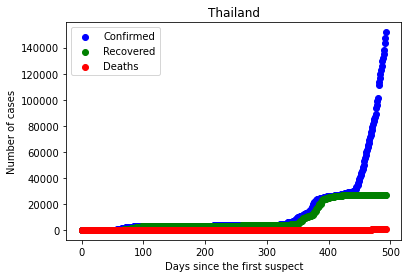

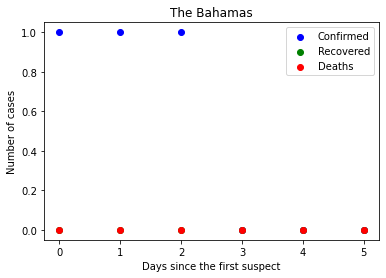

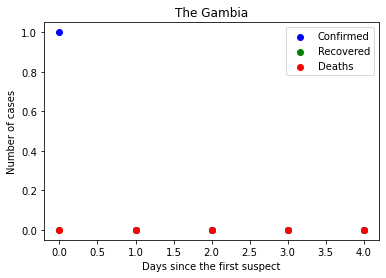

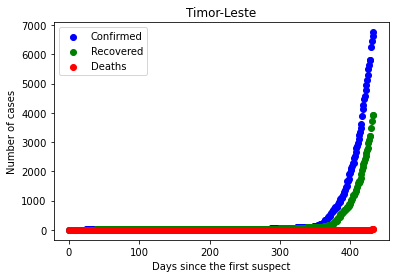

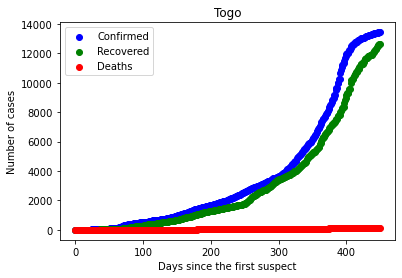

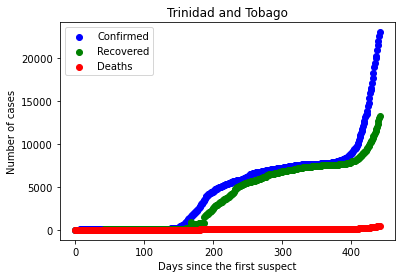

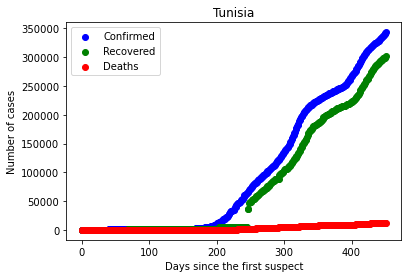

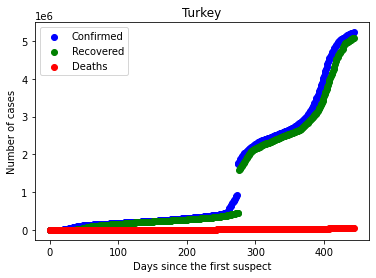

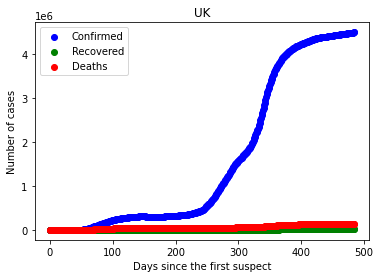

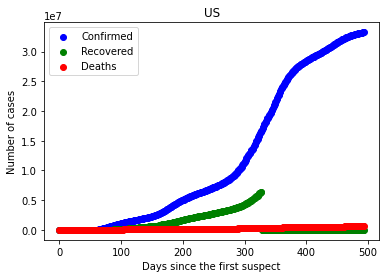

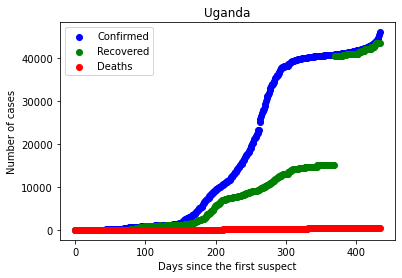

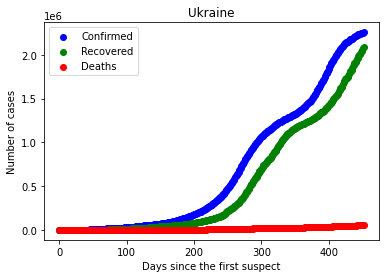

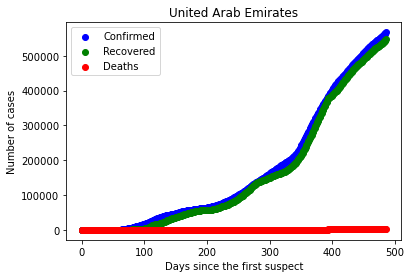

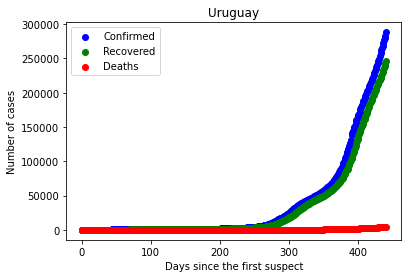

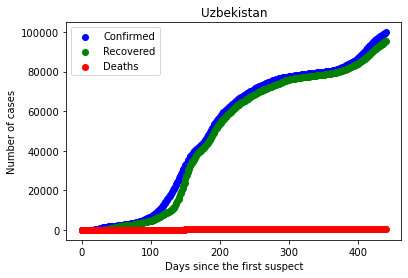

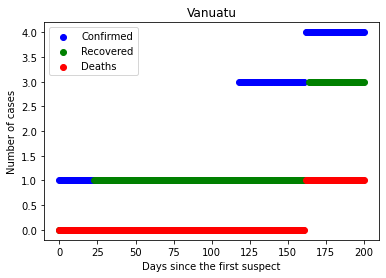

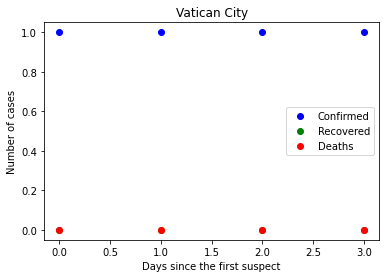

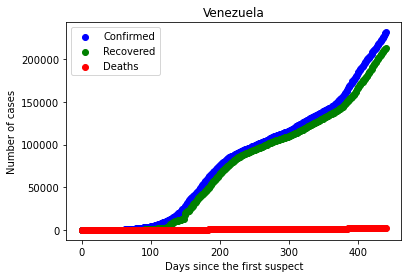

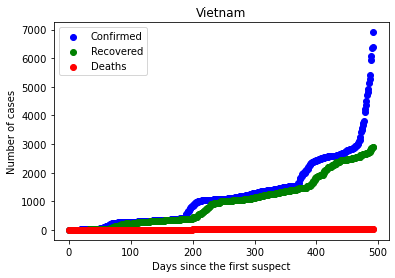

In [ ]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [ ]:

df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [ ]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()